# Two mode networks and structural equivalence

## From two-mode to one-mode networks

To illustrate how to use matrix multiplication to transform a 2-mode network into a 1-mode network, we make use of the davis' women by event data set. The input data is an edge list in csv format.

In [1]:
library(igraph)

davis <- read.csv("../data/davis.csv", header = FALSE)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
class(davis)

[1] "data.frame"

In [3]:
head(davis)

,V1,V2
,<chr>,<int>
1,EVELYN,1
2,EVELYN,2
3,EVELYN,3
4,EVELYN,4
5,EVELYN,5
6,EVELYN,6


In [4]:
# We can transform the data frame format into an igraph object.
g <- graph_from_data_frame(davis, directed = FALSE, vertices = NULL)

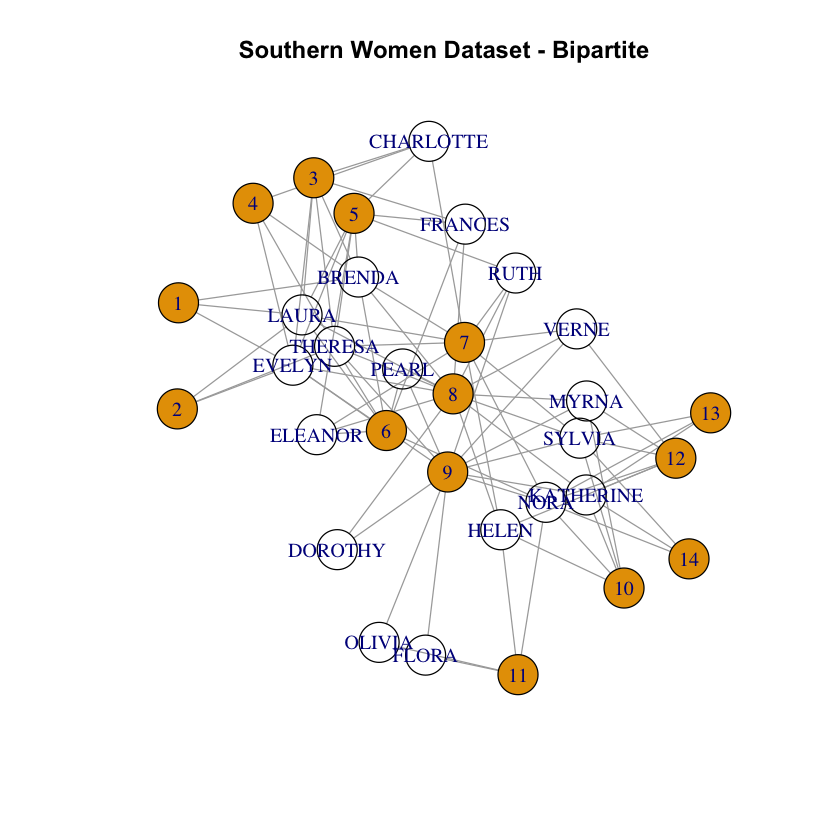

In [5]:
# To visualize the graph we have to save it as a bipartite network
g2M <- g
# V(): Create a vertex sequence (vs) containing all vertices of a graph
V(g2M)$type <- bipartite_mapping(g2M)$type  # Add the "type" attribute

plot(g2M,
     layout = layout_with_kk,
     main = "Southern Women Dataset - Bipartite",
     vertex.color = vertex_attr(g2M)$type)

In [6]:
# To do the matrix multiplication we save it as two-mode matrix
twomode_matrix <- as_incidence_matrix(g2M)
# This should give you the women by event matrix
twomode_matrix[]

,1,2,3,4,5,6,8,7,9,10,12,13,11,14
EVELYN,1,1,1,1,1,1,1,0,1,0,0,0,0,0
LAURA,1,1,1,0,1,1,1,1,0,0,0,0,0,0
THERESA,0,1,1,1,1,1,1,1,1,0,0,0,0,0
BRENDA,1,0,1,1,1,1,1,1,0,0,0,0,0,0
CHARLOTTE,0,0,1,1,1,0,0,1,0,0,0,0,0,0
FRANCES,0,0,1,0,1,1,1,0,0,0,0,0,0,0
ELEANOR,0,0,0,0,1,1,1,1,0,0,0,0,0,0
PEARL,0,0,0,0,0,1,1,0,1,0,0,0,0,0
RUTH,0,0,0,0,1,0,1,1,1,0,0,0,0,0
VERNE,0,0,0,0,0,0,1,1,1,0,1,0,0,0


In [7]:
# We can transpose the matrix and get the event by women matrix
t(twomode_matrix[])

,EVELYN,LAURA,THERESA,BRENDA,CHARLOTTE,FRANCES,ELEANOR,PEARL,RUTH,VERNE,MYRNA,KATHERINE,SYLVIA,NORA,HELEN,DOROTHY,OLIVIA,FLORA
1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0
8,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0
7,0,1,1,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0
9,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1
10,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0


In [8]:
# To convert the two-mode matrix to a one-mode matrix we can use matrix 
# multiplication. Do matrix multiplication to get person and event network
# The person by person matrix
p <- twomode_matrix %*% t(twomode_matrix)
p[]

,EVELYN,LAURA,THERESA,BRENDA,CHARLOTTE,FRANCES,ELEANOR,PEARL,RUTH,VERNE,MYRNA,KATHERINE,SYLVIA,NORA,HELEN,DOROTHY,OLIVIA,FLORA
EVELYN,8,6,7,6,3,4,3,3,3,2,2,2,2,2,1,2,1,1
LAURA,6,7,6,6,3,4,4,2,3,2,1,1,2,2,2,1,0,0
THERESA,7,6,8,6,4,4,4,3,4,3,2,2,3,3,2,2,1,1
BRENDA,6,6,6,7,4,4,4,2,3,2,1,1,2,2,2,1,0,0
CHARLOTTE,3,3,4,4,4,2,2,0,2,1,0,0,1,1,1,0,0,0
FRANCES,4,4,4,4,2,4,3,2,2,1,1,1,1,1,1,1,0,0
ELEANOR,3,4,4,4,2,3,4,2,3,2,1,1,2,2,2,1,0,0
PEARL,3,2,3,2,0,2,2,3,2,2,2,2,2,2,1,2,1,1
RUTH,3,3,4,3,2,2,3,2,4,3,2,2,3,2,2,2,1,1
VERNE,2,2,3,2,1,1,2,2,3,4,3,3,4,3,3,2,1,1


In [9]:
# The event by event matrix
e <- t(twomode_matrix) %*% twomode_matrix
e[]

,1,2,3,4,5,6,8,7,9,10,12,13,11,14
1,3,2,3,2,3,3,3,2,1,0,0,0,0,0
2,2,3,3,2,3,3,3,2,2,0,0,0,0,0
3,3,3,6,4,6,5,5,4,2,0,0,0,0,0
4,2,2,4,4,4,3,3,3,2,0,0,0,0,0
5,3,3,6,4,8,6,7,6,3,0,0,0,0,0
6,3,3,5,3,6,8,7,5,4,1,1,1,1,1
8,3,3,5,3,7,7,14,8,9,4,5,2,1,2
7,2,2,4,3,6,5,8,10,5,3,4,2,2,2
9,1,2,2,2,3,4,9,5,12,4,5,3,3,3
10,0,0,0,0,0,1,4,3,4,5,5,3,2,3


As discussed by Borgatti in section 13.2, it can be a good idea to normalize the overlap to take into account the size of events and/or the frequence of participation of the women. The following lines execute the normalization as proposed by Bonacich '72. 

Mathematically, the normalization works in the following way -- formulated for the transformation into a person-by-person matrix: 

Consider two actors `i` and `j` and let `X` be the product of the number events they both attended and the number of events they both did not attend. Let `Y` be the product of the number events `i` attended and `j` did not, with the number of events `j` attended and `i` did not. 

If $X=Y$ the normalized entry is $0.5$. Otherwise it is $X-\sqrt{XY} \over X-Y$. As far as I know the Bonacich normalization is not part of the standard measures in igraph but the following script will calculate it for you

In [10]:
#we do it first for the person-by-person network
p_norm <- p
total_events <- ncol(e)
total_events

[1] 14

In [11]:
person_matrix_diagonal <- diag(p)
nrow(p)

[1] 18

In [12]:
ncol(p)

[1] 18

In [13]:
# Create the loop with r and c to iterate over the matrix
for (i in 1:nrow(p)) {
  for (j in 1:ncol(p)) { 
    a <- p[i, j]
    # print(a)
    b <- p[i, i]- p[i, j]
    #print(b)
    c <- p[j, j]- p[j, i]
    #print(c)
    d <- total_events - a - b - c
    #print(d)
    if (a * d == b * c) {
      p_norm[i, j] <- 50
    } else {
      p_norm[i, j] <- ((a * d - sqrt (a * d * b * c)) / ( (a * d)  -  (b * c))) * 100
    }
    #print(e_norm)
  }
}
format(p_norm[], digits = 2)

,EVELYN,LAURA,THERESA,BRENDA,CHARLOTTE,FRANCES,ELEANOR,PEARL,RUTH,VERNE,MYRNA,KATHERINE,SYLVIA,NORA,HELEN,DOROTHY,OLIVIA,FLORA
EVELYN,100,79,86,79,63,100,63,100,63,45,45,29,21,0,21,100,46,46
LAURA,79,100,79,86,68,100,100,61,68,50,32,21,29,21,42,50,0,0
THERESA,86,79,100,79,100,100,100,100,100,63,45,29,35,26,37,100,46,46
BRENDA,79,86,79,100,100,100,100,61,68,50,32,21,29,21,42,50,0,0
CHARLOTTE,63,68,100,100,100,67,67,0,67,47,0,0,32,27,41,0,0,0
FRANCES,100,100,100,100,67,100,84,75,67,47,47,37,32,27,41,63,0,0
ELEANOR,63,100,100,100,67,84,100,75,84,67,47,37,50,45,60,63,0,0
PEARL,100,61,100,61,0,75,75,100,75,75,75,65,61,56,48,100,69,69
RUTH,63,68,100,68,67,67,84,75,100,84,67,55,68,45,60,100,63,63
VERNE,45,50,63,50,47,47,67,75,84,100,84,73,100,63,78,100,63,63


In [14]:
#and now for the event-by-event matrix 
e_norm <- e
total_persons <- ncol(p)
total_persons

[1] 18

In [15]:
event_matrix_diagonal <- diag(e)
nrow(e)

[1] 14

In [16]:
ncol(e)

[1] 14

In [17]:
# Create the loop with r and c to iterate over the matrix
for (i in 1:nrow(e)) {
  for (j in 1:ncol(e)) { 
    a <- e[i ,j]
    # print(a)
    b <- e[i, i] - e[i, j]
    #print(b)
    c <- e[j, j] - e[j, i]
    #print(c)
    d <- total_persons - a - b - c
    #print(d)
    if (a * d == b * c) {
      e_norm[i, j] <- 50
    } else {
      e_norm[i, j] <- ((a * d - sqrt (a * d * b * c))  / ( (a * d)  -  (b * c))) * 100
      }
    #print(e_norm)
  }
}
format(e_norm[], digits = 0)
#you can compare the results for the event-by-event matrix with matrix 13.4 in borgatti.  

,1,2,3,4,5,6,8,7,9,10,12,13,11,14
1,100,84,100,78,100,100,100,57,30,0,0,0,0,0
2,84,100,100,78,100,100,100,57,50,0,0,0,0,0
3,100,100,100,100,100,79,56,59,24,0,0,0,0,0
4,78,78,100,100,100,70,47,63,39,0,0,0,0,0
5,100,100,100,100,100,78,63,68,21,0,0,0,0,0
6,100,100,79,70,78,100,63,56,33,32,27,43,37,43
8,100,100,56,47,63,63,100,54,44,52,56,41,14,41
7,57,57,59,63,68,56,54,100,27,53,59,57,46,57
9,30,50,24,39,21,33,44,27,100,61,65,100,56,100
10,0,0,0,0,0,32,52,53,61,100,100,100,66,100
